# Bike Sharing Demand Prediction
This notebook analyzes and predicts the hourly bike rental demand using the Bike Sharing Demand dataset from Kaggle. The dataset contains historical data from a bike sharing service, including weather conditions, date/time information, and rental counts.

## Dataset Description
- **train.csv**: Contains 15 columns with hourly records of bike rentals, weather, and time features, including the target variable `count` (total rentals), and `casual`/`registered` (user types).
- **test.csv**: Contains 12 columns (same features as train, but without `count`, `casual`, and `registered`). Your task is to predict the `count` for these rows.

### Columns
- `datetime`: Hourly timestamp for the record
- `season`: 1 = spring, 2 = summer, 3 = fall, 4 = winter
- `holiday`: Whether the day is a holiday (1) or not (0)
- `workingday`: Whether the day is neither a weekend nor holiday (1) or not (0)
- `weather`: 1 = Clear, 2 = Mist, 3 = Light Snow/Rain, 4 = Heavy Rain/Snow
- `temp`: Temperature in Celsius
- `atemp`: "Feels like" temperature in Celsius
- `humidity`: Relative humidity (%)
- `windspeed`: Wind speed
- `casual`: Number of non-registered user rentals (train only)
- `registered`: Number of registered user rentals (train only)
- `count`: Total number of rentals (target, train only)

## Project Workflow
1. **Data Loading & Exploration**: Read and inspect the data, check for missing values, and visualize distributions.
2. **Feature Engineering**: Extract time-based features (hour, day, month, year), encode categorical variables, and create new features to improve model performance.
3. **Data Preprocessing**: Standardize features, handle skewness in the target variable, and split data for training and validation.
4. **Model Training & Evaluation**: Train multiple regression models, compare their performance, and select the best one.
5. **Prediction**: Use the best model to predict bike demand on the test set for submission.

---
**Goal:** Build a regression model to accurately predict hourly bike rental counts based on weather and time features.

In [36]:
# importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score
from sklearn.pipeline import Pipeline


## Train Dataset

## Train Dataset Summary

The `train.csv` dataset contains 10,886 rows and 15 columns, representing hourly records of bike rentals along with associated weather and time features. Below is a summary of the columns:

| Column      | Data Type | Description                                                      |
|-------------|-----------|------------------------------------------------------------------|
| season      | int64     | Season (1: spring, 2: summer, 3: fall, 4: winter)                |
| holiday     | int64     | Whether the day is a holiday (1) or not (0)                      |
| workingday  | int64     | Whether the day is a working day (1) or not (0)                  |
| weather     | int64     | Weather situation (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow) |
| temp        | float64   | Temperature in Celsius                                           |
| atemp       | float64   | "Feels like" temperature in Celsius                              |
| humidity    | int64     | Relative humidity (%)                                            |
| windspeed   | float64   | Wind speed                                                       |
| casual      | int64     | Number of non-registered user rentals                            |
| registered  | int64     | Number of registered user rentals                                |
| count       | int64     | Total number of rentals (target variable)                        |
| Month       | int32     | Extracted month from datetime                                    |
| Day         | int32     | Extracted day from datetime                                      |
| Year        | int32     | Extracted year from datetime                                     |
| Hour        | int32     | Extracted hour from datetime                                     |

- **No missing values** in any column.
- **No duplicated rows**.
- The dataset is used for regression tasks to predict the `count` of bike rentals based on the provided features.

In [2]:
# Loading the datasets
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in the data science workflow. It involves summarizing the main characteristics of the dataset, often using visual methods, to better understand the data and uncover patterns, anomalies, or relationships between variables.

### Key Steps in EDA for Bike Sharing Demand

- **Data Inspection:**  
    - View the first few rows of the dataset to understand its structure.
    - Check data types and ensure columns are correctly formatted (e.g., dates as datetime objects).

- **Missing Values & Duplicates:**  
    - Identify and handle any missing or duplicated data to ensure data quality.

- **Statistical Summary:**  
    - Use descriptive statistics (mean, median, standard deviation, etc.) to summarize numerical features.

- **Feature Distributions:**  
    - Visualize distributions of key variables (e.g., `count`, `temp`, `humidity`) using histograms or KDE plots.

- **Relationships & Trends:**  
    - Use scatter plots, line plots, and bar plots to explore relationships between features and the target variable (`count`).
    - Analyze how demand varies by time (hour, day, month, season), weather, and other categorical features.

- **Correlation Analysis:**  
    - Generate a correlation matrix and heatmap to identify relationships between numerical variables.

- **Outlier Detection:**  
    - Use box plots to detect outliers in features such as `count`, `temp`, and `windspeed`.

EDA helps guide feature engineering, model selection, and further analysis by providing insights into the underlying patterns and potential challenges in the data.

In [4]:
# statistics summary
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
# Info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# Checking for missing values
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
# Checking for duplicated values
train_data.duplicated().sum()

np.int64(0)

In [8]:
# checking data types
train_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## Data Visualization

Data visualization is a key step in understanding and communicating the patterns, trends, and relationships within a dataset. By using graphical representations such as bar plots, line plots, scatter plots, and heatmaps, we can quickly identify correlations, outliers, and distributions that may not be obvious from raw data alone. Effective visualizations help guide feature engineering, model selection, and provide valuable insights for decision-making in predictive modeling tasks.

### Bar plot

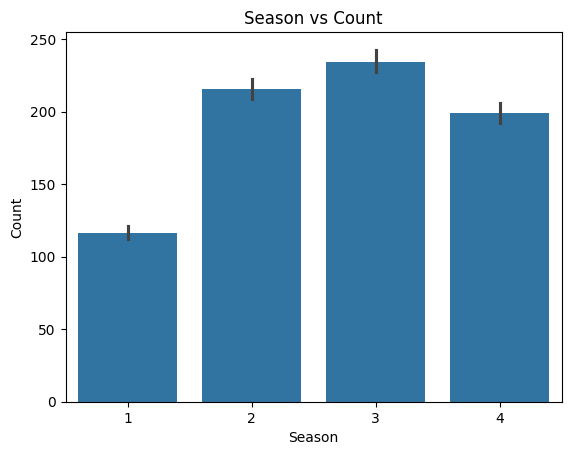

In [10]:
# Data Visualization

# plotting a scatter plot of season vs count
sns.barplot(data=train_data, x='season', y='count')
plt.title('Season vs Count')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

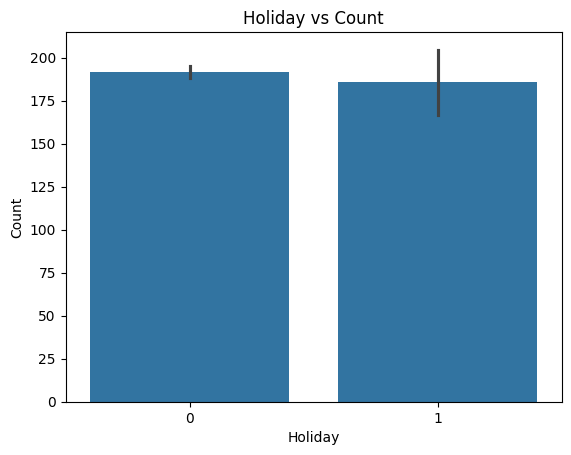

In [11]:
# Plotting a bar plot of holiday vs count
sns.barplot(data=train_data, x='holiday', y='count')
plt.title('Holiday vs Count')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

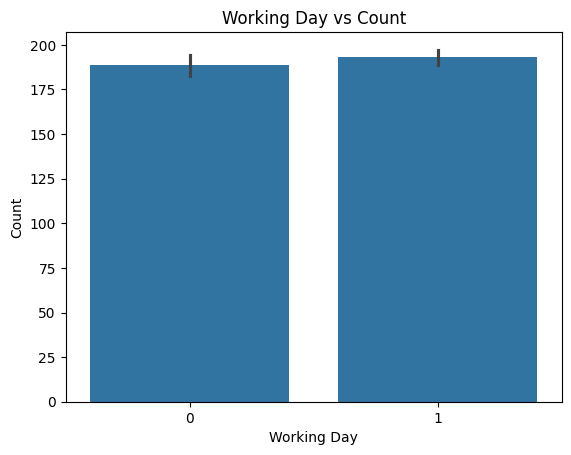

In [12]:
# plotting a bar plot of workingday vs count
sns.barplot(data=train_data, x='workingday', y='count')
plt.title('Working Day vs Count')
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show()

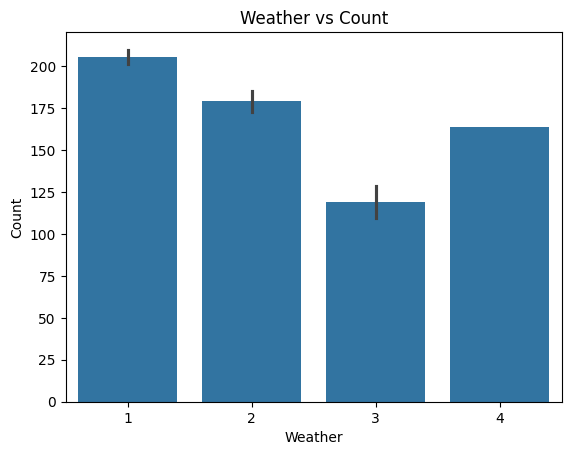

In [13]:
# plotting a bar plot of weather vs count
sns.barplot(data=train_data, x='weather', y='count')
plt.title('Weather vs Count')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

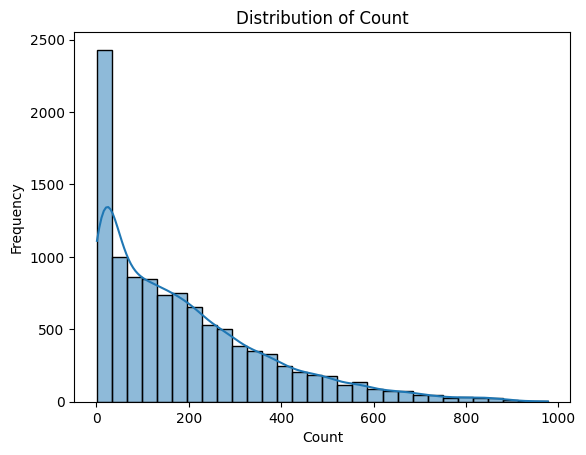

In [14]:
# Plotting a histogram of count column 
sns.histplot(train_data['count'], bins=30, kde=True)
plt.title('Distribution of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()



**Feature Engineering**
=======================

Feature engineering is the process of selecting and transforming raw data into features that are more suitable for modeling. The goal is to create features that are informative, relevant, and useful for machine learning algorithms to learn from.

**Key aspects of feature engineering:**

* **Data preprocessing**: handling missing values, data normalization, and feature scaling
* **Feature extraction**: extracting relevant information from raw data, such as text, images, or time series data
* **Feature transformation**: transforming existing features into new ones, such as log transformation or polynomial transformation
* **Feature selection**: selecting a subset of the most relevant features to use in the model


In [15]:
# splitting the datetime column into separate date and time columns
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
train_data['Month'] = train_data['datetime'].dt.month
train_data['Day'] = train_data['datetime'].dt.day
train_data['Year'] = train_data['datetime'].dt.year
train_data['Hour'] = train_data['datetime'].dt.hour
train_data.drop('datetime', axis=1, inplace=True)

### Line Plot

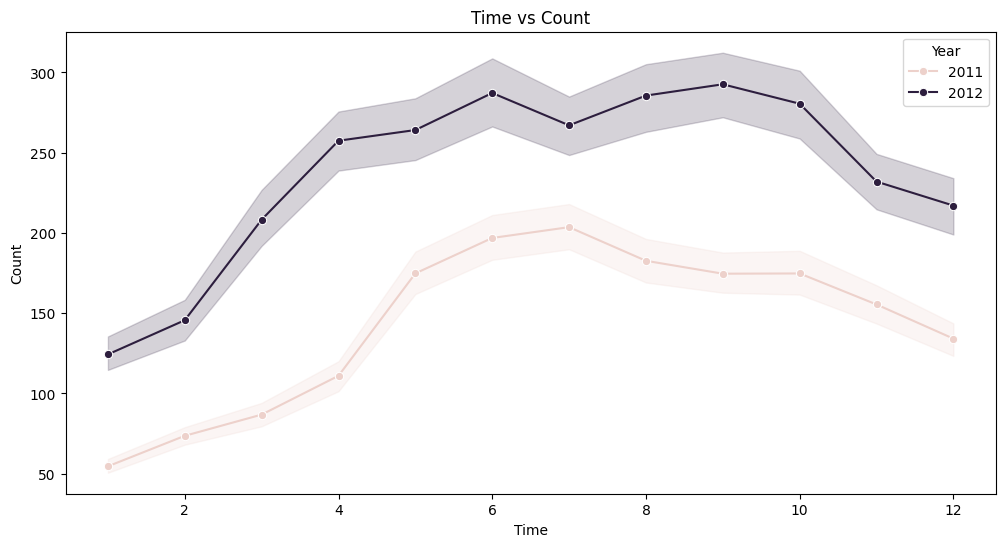

In [16]:
# plotting a line plot of time vs count
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x='Month', y='count', hue='Year', marker='o')
plt.title('Time vs Count')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

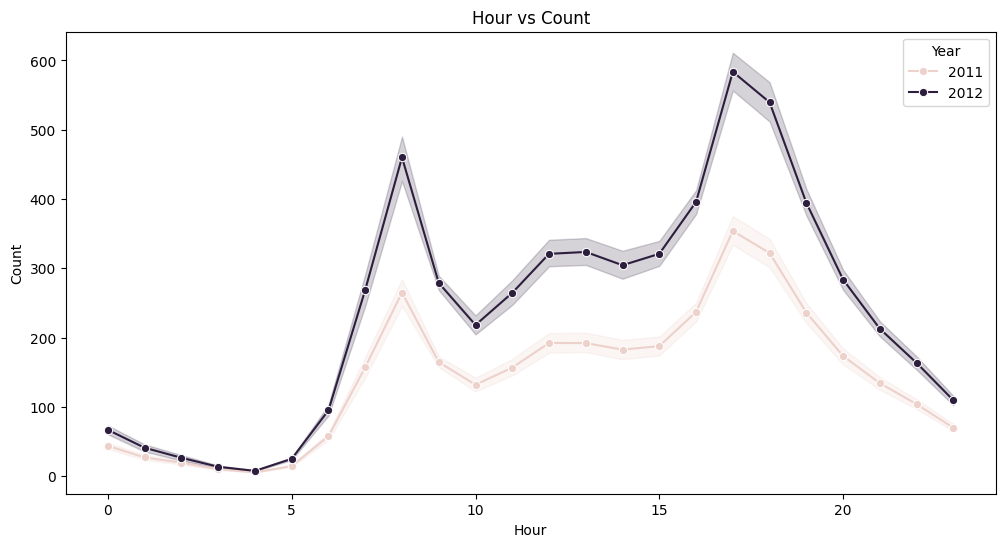

In [17]:
# plotting a line plot of hour vs count
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x='Hour', y='count', hue='Year', marker='o')
plt.title('Hour vs Count')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

### Scatter plot

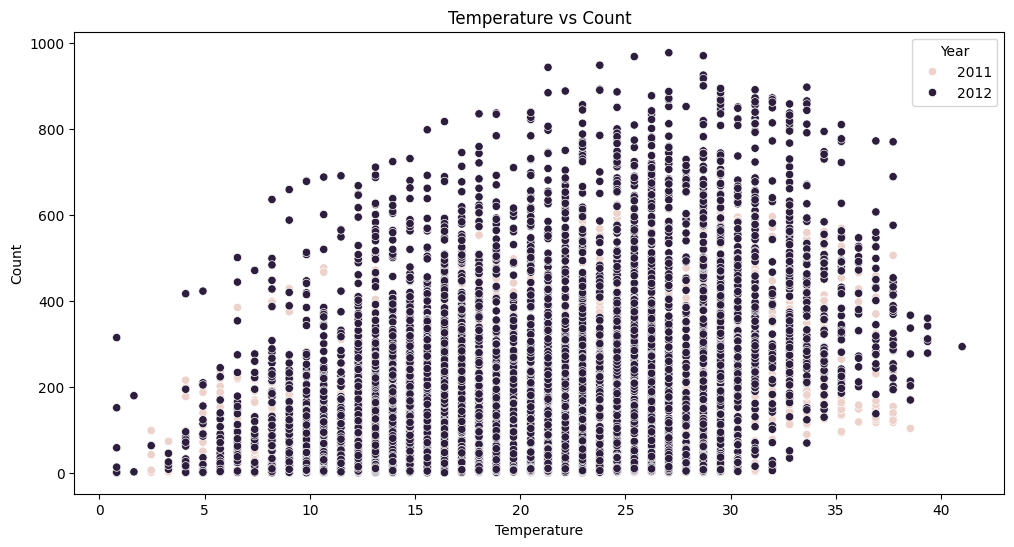

In [18]:
# plotting a scatter plot of temp vs count
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_data, x='temp', y='count', hue='Year', markers = "o")
plt.title('Temperature vs Count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

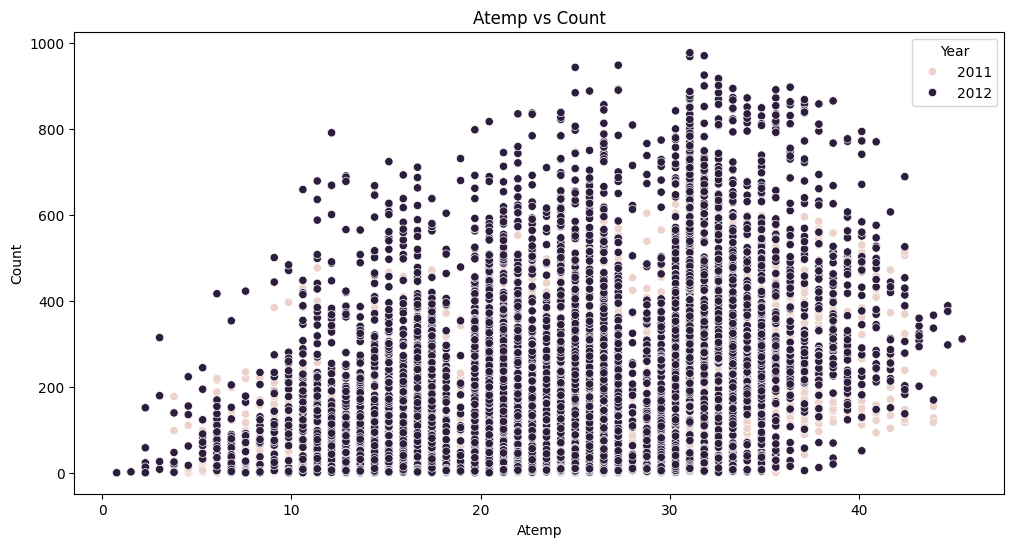

In [19]:
# plotting a scatter plot of atemp vs count
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_data, x='atemp', y='count', hue='Year')
plt.title('Atemp vs Count')
plt.xlabel('Atemp')
plt.ylabel('Count')
plt.show()

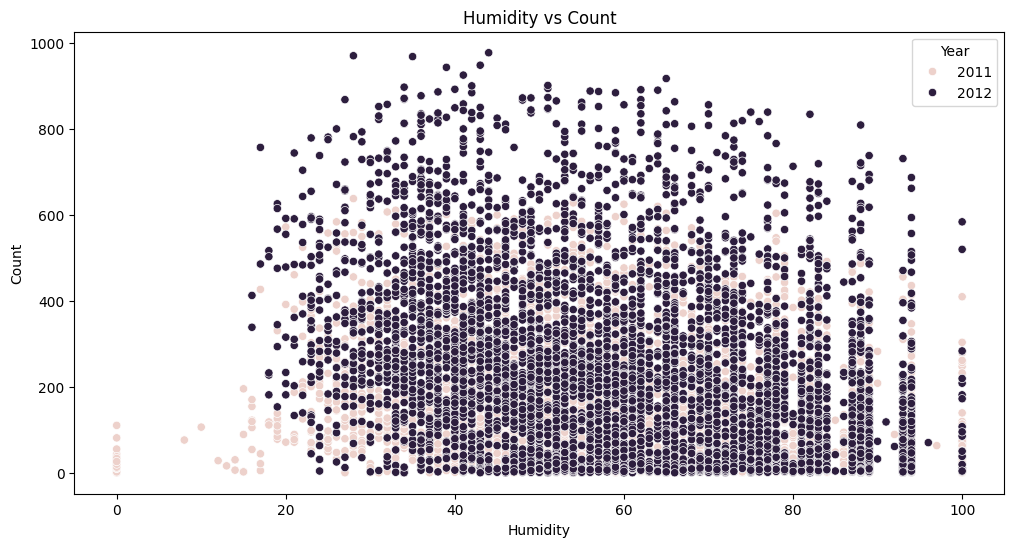

In [20]:
# plotting a scatter plot of humidity vs count
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_data, x='humidity', y='count', hue='Year')
plt.title('Humidity vs Count')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

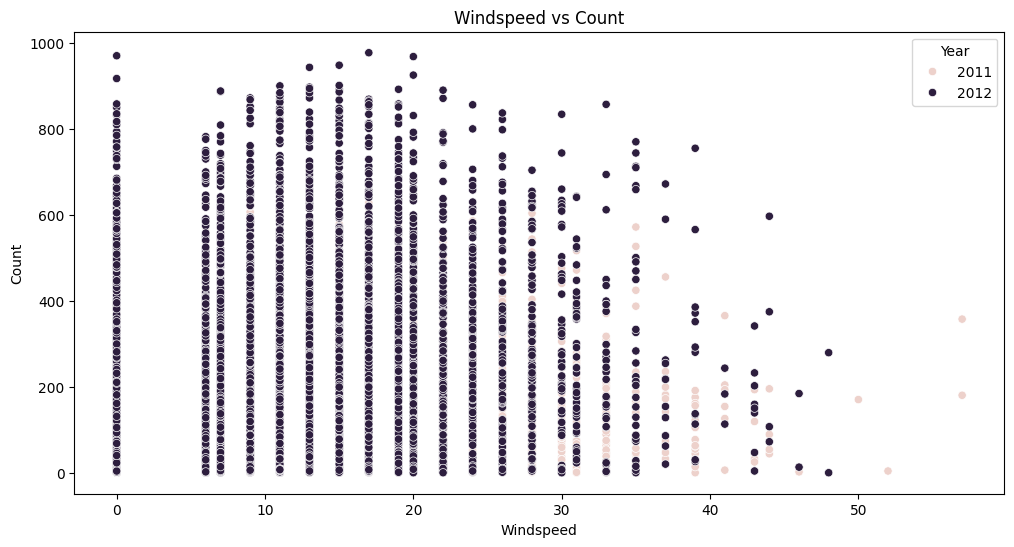

In [21]:
# plotting a scatter plot of windspeed vs count
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_data, x='windspeed', y='count', hue='Year')
plt.title('Windspeed vs Count')
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.show()

### Box plot

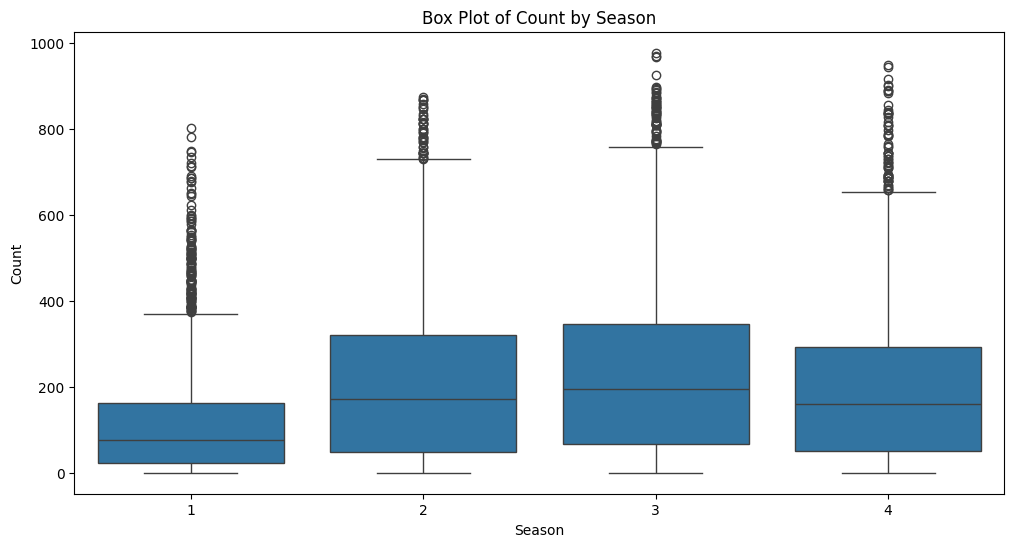

In [22]:
# Box plot of count by hour
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='season', y='count')
plt.title('Box Plot of Count by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

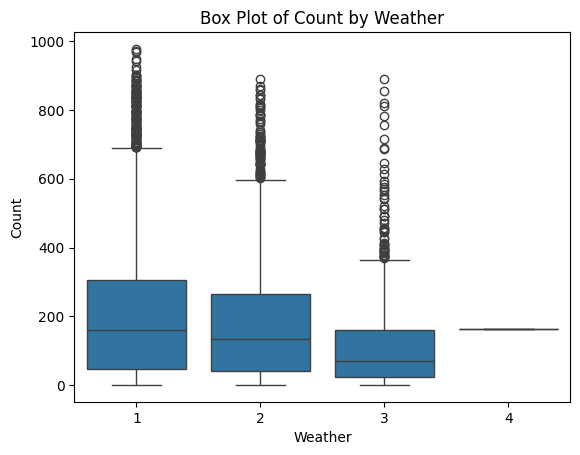

In [23]:
# creating a box plot of  weather vs count
sns.boxplot(data=train_data, x='weather', y='count')
plt.title('Box Plot of Count by Weather')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

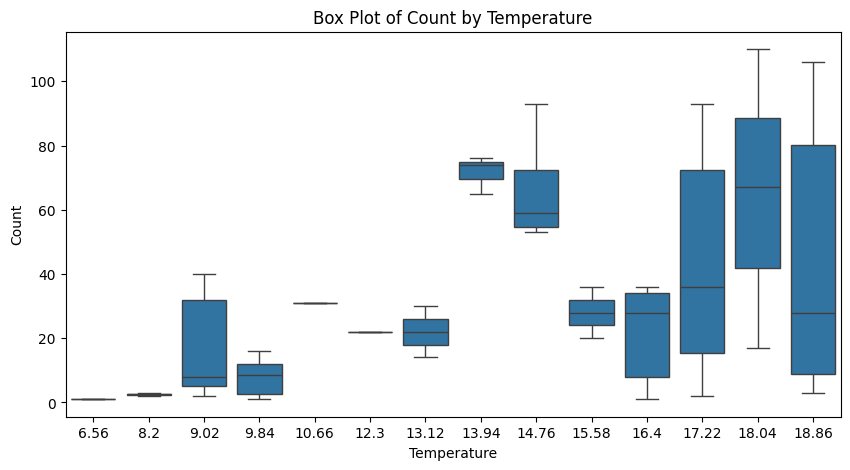

In [24]:
# creating a box plot of  temp vs count
plt.figure(figsize=(10,5))
sns.boxplot(data=train_data.head(50), x='temp', y='count')
plt.title('Box Plot of Count by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

### Correlation Matrix

In [25]:
train_data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'Month',
       'Day', 'Year', 'Hour'],
      dtype='object')

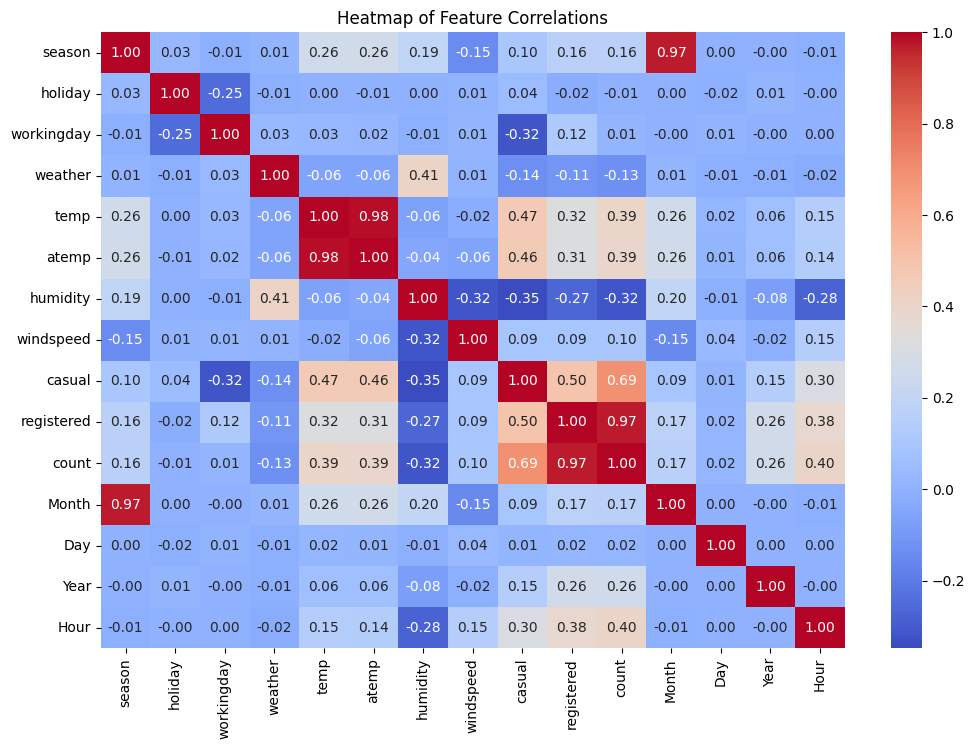

In [26]:
# plotting a heatmap of correlations
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap of Feature Correlations')
plt.show()

## Test Dataset

In [27]:
test_data = pd.read_csv('test.csv')
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [28]:
# Checking the datatypes
test_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [29]:
# Checking missing values of test dataset
test_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [30]:
# checking the duplicates in test dataset
test_data.duplicated().sum()

np.int64(0)



**Feature Engineering**
=======================

Feature engineering is the process of selecting and transforming raw data into features that are more suitable for modeling. The goal is to create features that are informative, relevant, and useful for machine learning algorithms to learn from.

**Key aspects of feature engineering:**

* **Data preprocessing**: handling missing values, data normalization, and feature scaling
* **Feature extraction**: extracting relevant information from raw data, such as text, images, or time series data
* **Feature transformation**: transforming existing features into new ones, such as log transformation or polynomial transformation
* **Feature selection**: selecting a subset of the most relevant features to use in the model

These engineered features can help the model better understand the relationships between customer behavior and churn.

In [31]:
# Converting 'datetime' to datetime type of test dataset
test_data['datetime'] = pd.to_datetime(test_data['datetime'])
# Extracting additional time features
test_data['Month'] = test_data['datetime'].dt.month
test_data['Day'] = test_data['datetime'].dt.day
test_data['Year'] = test_data['datetime'].dt.year
test_data['Hour'] = test_data['datetime'].dt.hour
# dropping the original datetime column
test_data = test_data.drop(columns=['datetime'])


In [32]:
test_data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Month', 'Day', 'Year', 'Hour'],
      dtype='object')


## Data Wrangling

Data wrangling, also known as data cleaning or data preprocessing, is the process of transforming raw data into a structured and usable format for analysis and modeling. In this notebook, data wrangling includes:

- **Handling Missing Values:**  
    Checked for missing values in both train and test datasets to ensure data completeness.

- **Removing Duplicates:**  
    Verified and removed any duplicate records to maintain data integrity.

- **Feature Extraction:**  
    Extracted additional time-based features (`Month`, `Day`, `Year`, `Hour`) from the `datetime` column to enhance predictive power.

- **Data Type Conversion:**  
    Converted columns to appropriate data types (e.g., parsing `datetime` as a datetime object).

- **Feature Selection:**  
    Selected relevant features for modeling by excluding target and identifier columns.

- **Standardization:**  
    Applied feature scaling using `StandardScaler` to normalize the input features, improving model performance.

- **Target Transformation:**  
    Applied log transformation to the target variable (`count`) to reduce skewness and stabilize variance.

These steps ensure the dataset is clean, consistent, and ready for effective machine learning model training and evaluation.
```

In [ ]:
# Align train and test columns for modeling
# Drop target columns from train to get feature columns
feature_cols = [col for col in train_data.columns if col not in ['count', 'casual', 'registered']]

X_train = train_data[feature_cols]
y_train = train_data['count']

# Selecting Feature column of test.csv dataset
X_test = test_data[feature_cols]


## StandardScaler

`StandardScaler` is a preprocessing tool from scikit-learn that standardizes features by removing the mean and scaling to unit variance. This ensures each feature contributes equally to the model, improving convergence and performance for many machine learning algorithms. It is especially useful when features are measured on different scales.

In [34]:
# Standarizing the datasets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = np.log1p(y_train)  # Log transformation for better model performance

In [38]:
# X_train: your features, y_train: your target variable
x_train, x_test, y_train_split, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

## Training the Model

In this section, multiple regression models are trained to predict bike rental demand. The following models are evaluated:

- **Linear Regression**
- **Random Forest Regressor**
- **Decision Tree Regressor**
- **Support Vector Regressor (SVR)**
- **K-Nearest Neighbors Regressor**
- **Multi-layer Perceptron Regressor (MLPRegressor)**
- **XGBoost Regressor**

Each model is trained on the training split (`x_train`, `y_train_split`) and evaluated on the validation split (`x_test`, `y_test`). The evaluation metrics used are:

- **MAE (Mean Absolute Error)**
- **MAPE (Mean Absolute Percentage Error)**
- **MSE (Mean Squared Error)**
- **R² Score**

The results are collected in a summary table to compare model performance and select the best model for final predictions.

In [43]:
# Training the model
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "KNeighbors": KNeighborsRegressor(),
    "MLPRegressor": MLPRegressor(),
    "XGBoost": XGBRegressor()
}
# Training the models and saving the results
results = {}
for name, model in models.items():
    model.fit(x_train, y_train_split)
    y_pred = model.predict(x_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }
# making the results more readable
results_df = pd.DataFrame(results).T
results_df

/home/muhammad-aftab/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,MAE,MAPE,MSE,R2
Linear Regression,0.813951,0.271245,1.051980,0.488959
Random Forest,0.218882,0.073740,0.106177,0.948420
Decision Tree,0.301646,0.101485,0.206915,0.899483
SVR,0.581477,0.210423,0.672928,0.673099
KNeighbors,0.611298,0.212246,0.754741,0.633355
MLPRegressor,0.294401,0.098247,0.160360,0.922099
XGBoost,0.213389,0.071552,0.095969,0.953379


## Best Model

### Best Model Summary

The best model based on **R² score** is:

**Best Model:** `XGBoost`

**Performance Metrics:**

| Metric | Value |
|--------|-------|
| MAE    | 0.2134 |
| MAPE   | 0.0716 |
| MSE    | 0.0960 |
| R²     | 0.9534 |

- **MAE**: Mean Absolute Error  
- **MAPE**: Mean Absolute Percentage Error  
- **MSE**: Mean Squared Error  
- **R²**: Coefficient of Determination

The XGBoost model achieved the highest R² score, indicating excellent predictive performance on the validation set.

In [48]:
# Best Model training on X_test data using a Pipeline method
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ('model', XGBRegressor())
])
pipeline.fit(x_train, y_train_split)
# Predicting on the test set
y_pred = pipeline.predict(X_test)
y_pred = np.expm1(y_pred)  # Inverse log transformation
y_pred = pd.DataFrame(y_pred, columns=['count'])
y_pred.head(500)


,count
0,8.839697
1,4.075304
2,2.121567
3,1.228515
4,1.383868
...,...
495,116.423454
496,151.337036
497,134.787521
498,152.266678


In [62]:
# Assuming test.csv has a 'datetime' column
submission = pd.read_csv('test.csv')[['datetime']]
submission['count'] = y_pred['count']
submission.to_csv('submission.csv', index=False)

# Bike Sharing Demand Prediction

This notebook presents a complete workflow for predicting hourly bike rental demand using the Kaggle Bike Sharing Demand dataset. The process includes data loading, exploratory data analysis (EDA), feature engineering, data preprocessing, model training, evaluation, and generating predictions for submission.

## Key Steps

1. **Data Loading & Inspection**
    - Loaded `train.csv` and `test.csv` datasets.
    - Inspected data structure, checked for missing values and duplicates, and explored data types.

2. **Exploratory Data Analysis (EDA)**
    - Visualized distributions and relationships using bar plots, line plots, scatter plots, histograms, and box plots.
    - Analyzed how demand varies by season, holiday, working day, weather, temperature, humidity, windspeed, and time features (hour, day, month, year).
    - Examined feature correlations with a heatmap.

3. **Feature Engineering**
    - Extracted time-based features (`Month`, `Day`, `Year`, `Hour`) from the `datetime` column.
    - Removed the original `datetime` column after extraction.

4. **Data Preprocessing**
    - Selected relevant features for modeling, excluding target and identifier columns.
    - Standardized features using `StandardScaler` to ensure equal contribution to the model.
    - Applied log transformation to the target variable (`count`) to reduce skewness.
    - Split the training data into training and validation sets.

5. **Model Training & Evaluation**
    - Trained and evaluated multiple regression models:
      - Linear Regression
      - Random Forest Regressor
      - Decision Tree Regressor
      - Support Vector Regressor (SVR)
      - K-Nearest Neighbors Regressor
      - Multi-layer Perceptron Regressor (MLPRegressor)
      - XGBoost Regressor
    - Compared models using MAE, MAPE, MSE, and R² metrics.
    - XGBoost achieved the best performance (highest R² score).

6. **Prediction & Submission**
    - Retrained the best model (XGBoost) using a pipeline with scaling.
    - Predicted bike rental counts for the test set and applied inverse log transformation.
    - Prepared the submission file with predicted counts.

## Results

- **Best Model:** XGBoost Regressor
- **Performance on Validation Set:**
  - MAE: ~0.213
  - MAPE: ~0.072
  - MSE: ~0.096
  - R²: ~0.953

## Conclusion

The notebook demonstrates a robust approach to regression modeling for time-series demand prediction, leveraging feature engineering, thorough EDA, and model comparison. The XGBoost model provides highly accurate predictions for hourly bike rental demand.